In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Análisis de Datos

Recordemos del tema inicial de `Pandas` los cinco (5) pasos para el análisis de datos:

- cargar, 


- preparar, 


- manipular, 


- modelar, y 


- analizar.

## Cargada de datos

Los datos pueden provenir de diferentes fuentes. Se pueden ir generando a medida que se desarrolla el problema o se pueen cargar de archivos externos. Vamos a leer el conjunto de datos (`dataset`) desde un archivo de texto (`csv`) y adicionalmente convertimos la columna de la serie temporal con el argumento `parse_dates`.

In [13]:
dfdata = pd.read_csv("Datasets/timestamp01.csv", parse_dates=['timestamp'])

## Inspección de la información

Una vez cargados los datos se hace una inspección de los mismos para saber del tipo, cantidad, calidad, entre otros

In [14]:
dfdata.info()
print(dfdata)
dfdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71996 entries, 0 to 71995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    61582 non-null  float64       
 1   timestamp  61582 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 MB
       user_id           timestamp
0        621.0 2020-05-07 00:00:02
1        818.0 2020-05-07 00:00:10
2          4.0 2020-05-07 00:00:21
3        563.0 2020-05-07 00:00:21
4        671.0 2020-05-07 00:00:26
...        ...                 ...
71991      NaN                 NaT
71992      NaN                 NaT
71993      NaN                 NaT
71994      NaN                 NaT
71995      NaN                 NaT

[71996 rows x 2 columns]


,user_id,timestamp
0,621.0,2020-05-07 00:00:02
1,818.0,2020-05-07 00:00:10
2,4.0,2020-05-07 00:00:21
3,563.0,2020-05-07 00:00:21
4,671.0,2020-05-07 00:00:26


Haciendo una lectura de la información suministrada, se observa que los datos cargados están repartidos en dos columnas: `user_id` (del tipo `float64`) y `timestamp` (del tipo `datetime64[ns]`), y $71996$ filas, de las cuales $61582$ contienen datos no nulos (como se observan las últimas líneas mostradas.

## Limpieza de datos

El siguiente paso es hacer limpieza de los datos. La limpieza puede consistir en llenar los datos nulos (`NaN`) con algún valor fuera fuera del rango de valores preexistentes (en muchos casos por ejemplo con el número `-9999` para diferenciar de los datos reales). También pueden simplemente eliminarse, depende de la necesidad puntual.

Si se opta por rellenar los datos con algún valor diferente al rango original de los datos, para poderlos diferenciar posteriormente y filtrarlos, se usa el métodos `fillna()`, y entre el paréntesis se pone el valor de identificación (en este caso el $0$.

Si se decide excluirlos, se usa el método `dropna()` (sin argumento). Este será el método que emplearemos

In [15]:
dfdata = dfdata.dropna()
dfdata.info()
print(dfdata)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61582 entries, 0 to 61581
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    61582 non-null  float64       
 1   timestamp  61582 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB
       user_id           timestamp
0        621.0 2020-05-07 00:00:02
1        818.0 2020-05-07 00:00:10
2          4.0 2020-05-07 00:00:21
3        563.0 2020-05-07 00:00:21
4        671.0 2020-05-07 00:00:26
...        ...                 ...
61577     12.0 2020-05-07 23:59:18
61578    646.0 2020-05-07 23:59:20
61579    458.0 2020-05-07 23:59:34
61580    968.0 2020-05-07 23:59:53
61581    775.0 2020-05-07 23:59:59

[61582 rows x 2 columns]


Ahora se observa que la cantidad de entradas, $61582$ coincide con la totalidad de filas de datos (empezando en cero)

## Manipulación de datos

Una vez ya con los datos reales con los que vamos a trabajar, se procede a realizar una manipulación de la información para adecuarla al tipo de análisis a desarrollar. 

Como vamos a trabajar con un dataset que contiene series temporales (datos representados en formato de tiempo, `timeseries`), se emplea que la columna con el dato temporal se convierta en el índice del `dataframe`

In [16]:
dfdata.set_index('timestamp', inplace=True)
dfdata.index

DatetimeIndex(['2020-05-07 00:00:02', '2020-05-07 00:00:10',
               '2020-05-07 00:00:21', '2020-05-07 00:00:21',
               '2020-05-07 00:00:26', '2020-05-07 00:00:28',
               '2020-05-07 00:00:33', '2020-05-07 00:00:58',
               '2020-05-07 00:01:00', '2020-05-07 00:01:04',
               ...
               '2020-05-07 23:58:53', '2020-05-07 23:58:55',
               '2020-05-07 23:58:57', '2020-05-07 23:59:08',
               '2020-05-07 23:59:13', '2020-05-07 23:59:18',
               '2020-05-07 23:59:20', '2020-05-07 23:59:34',
               '2020-05-07 23:59:53', '2020-05-07 23:59:59'],
              dtype='datetime64[ns]', name='timestamp', length=61582, freq=None)

y la columna `user_id` que aparece como `float64` realmente son valores enteros. Se hace el cambio de tipo a `int64`.

In [17]:
dfdata['user_id'] = dfdata['user_id'].astype(np.int64)
dfdata.info()
dfdata.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61582 entries, 2020-05-07 00:00:02 to 2020-05-07 23:59:59
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  61582 non-null  int64
dtypes: int64(1)
memory usage: 962.2 KB


,user_id
timestamp,
2020-05-07 00:00:02,621
2020-05-07 00:00:10,818
2020-05-07 00:00:21,4
2020-05-07 00:00:21,563
2020-05-07 00:00:26,671


## Modelar

A continuación haremos unas operaciones básicas de consulta de información.

Inicialmente, localicemos los datos que tienen índice `2020-05-06 00:00:21`

In [18]:
dfdata.loc['2020-05-07 00:00:21']

,user_id
timestamp,
2020-05-07 00:00:21,4
2020-05-07 00:00:21,563


o que se encuentran dentro de un rango establecido:

In [19]:
dfdata.loc['2020-05-07 00:00:02':'2020-05-07 00:00:59']

,user_id
timestamp,
2020-05-07 00:00:02,621
2020-05-07 00:00:10,818
2020-05-07 00:00:21,4
2020-05-07 00:00:21,563
2020-05-07 00:00:26,671
2020-05-07 00:00:28,780
2020-05-07 00:00:33,136
2020-05-07 00:00:58,621
2020-05-07 00:00:05,296


Podemos también graficar la información

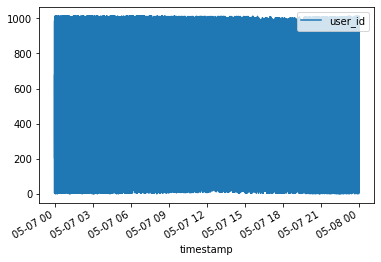

In [20]:
dfdata.plot()

o realizar un conteo de la cantidad de ingresos en un determinado rango de tiempo establecido (existen muchos otros estadísticos con los que se puede explorar)

In [24]:
dfResampliado = dfdata.resample('H',label='right').count()

,user_id
timestamp,
2020-05-07 01:00:00,2747
2020-05-07 02:00:00,2651
2020-05-07 03:00:00,2751
2020-05-07 04:00:00,2509
2020-05-07 05:00:00,2628
2020-05-07 06:00:00,2560
2020-05-07 07:00:00,2509
2020-05-07 08:00:00,2616
2020-05-07 09:00:00,2575


In [22]:
dfdata.resample('H',label='right').mean()

,user_id
timestamp,
2020-05-07 01:00:00,481.303240
2020-05-07 02:00:00,477.325160
2020-05-07 03:00:00,483.777899
2020-05-07 04:00:00,476.830610
2020-05-07 05:00:00,487.702055
2020-05-07 06:00:00,486.664062
2020-05-07 07:00:00,487.471901
2020-05-07 08:00:00,494.764144
2020-05-07 09:00:00,464.468738


In [23]:
dfdata.resample('H',label='right').sum()

,user_id
timestamp,
2020-05-07 01:00:00,1322140
2020-05-07 02:00:00,1265389
2020-05-07 03:00:00,1330873
2020-05-07 04:00:00,1196368
2020-05-07 05:00:00,1281681
2020-05-07 06:00:00,1245860
2020-05-07 07:00:00,1223067
2020-05-07 08:00:00,1294303
2020-05-07 09:00:00,1196007


y volvemos a graficar...

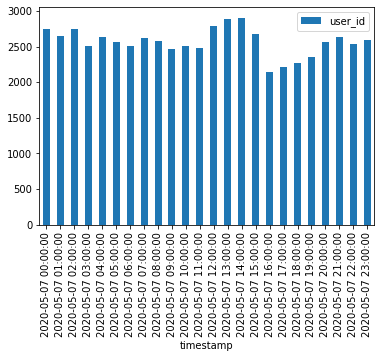

In [25]:
contar = dfdata.resample('H').count().plot.bar()

## Analizar ...